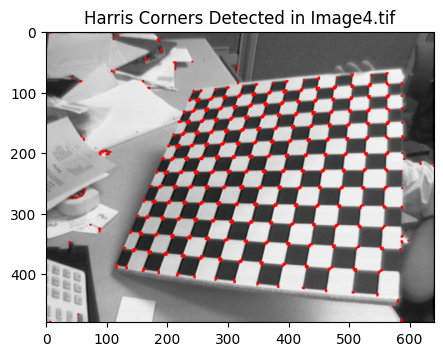

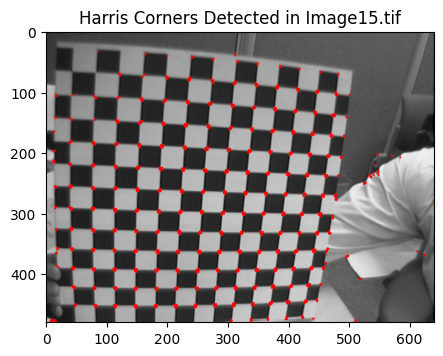

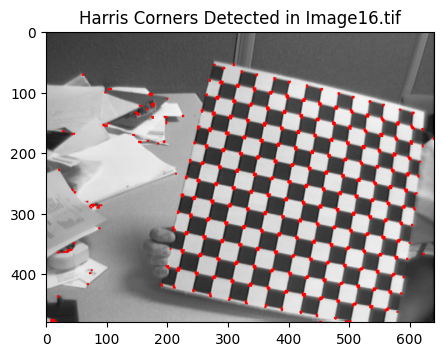

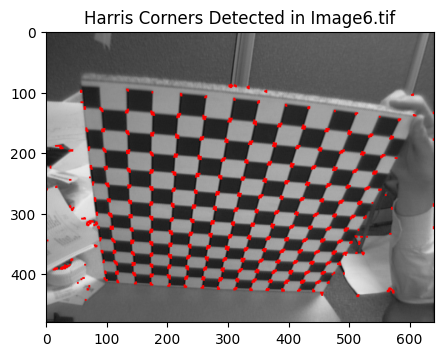

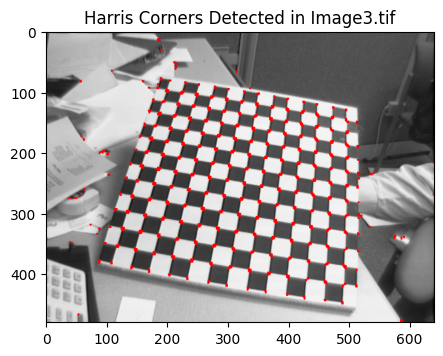

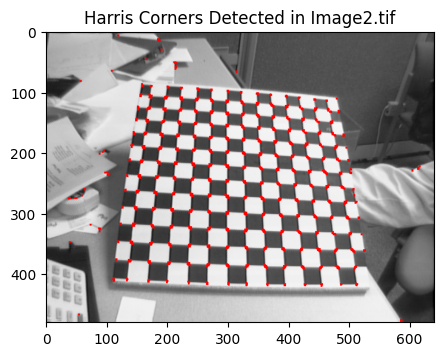

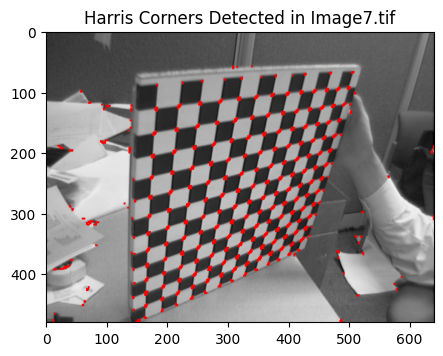

In [ ]:
#harris corner
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Get a list of all .tif images in the specified directory
images = glob.glob('*.tif')  # Update with the correct path

for fname in images:
    # Read each image
    image = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Harris corner detector
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Dilate the corner points to enhance visualization
    dst = cv2.dilate(dst, None)

    # Threshold to get only the corners
    image[dst > 0.01 * dst.max()] = [0, 0, 255]

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Visualize the image with matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(image_rgb)
    plt.title(f'Harris Corners Detected in {fname}')
    plt.show()


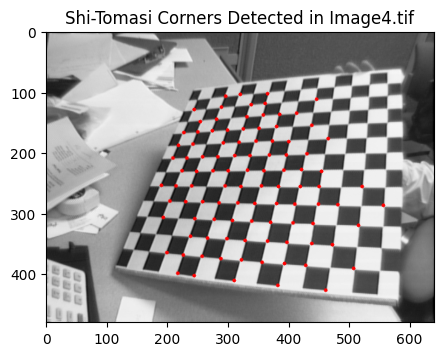

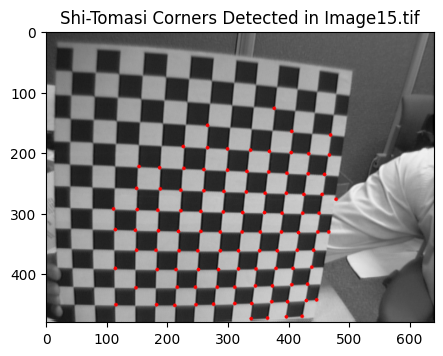

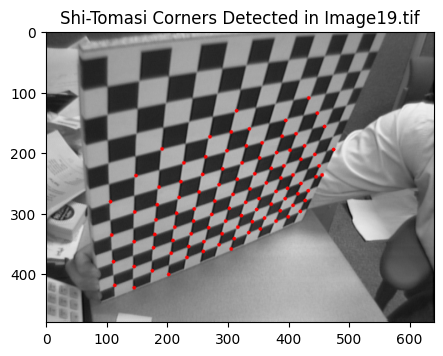

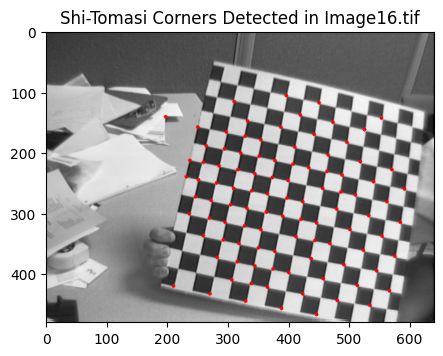

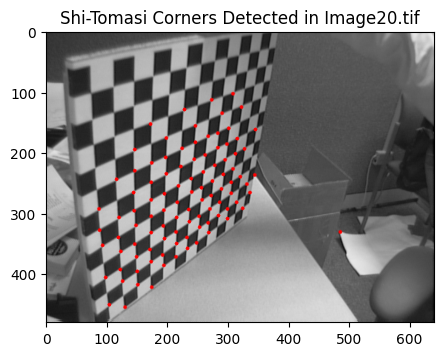

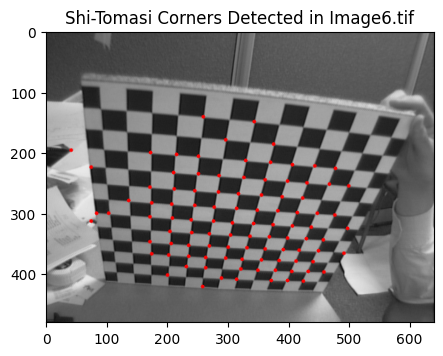

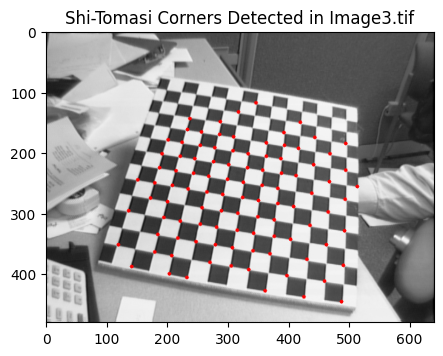

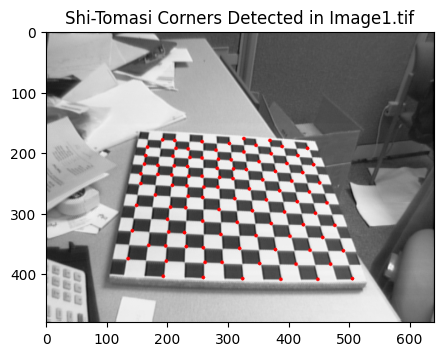

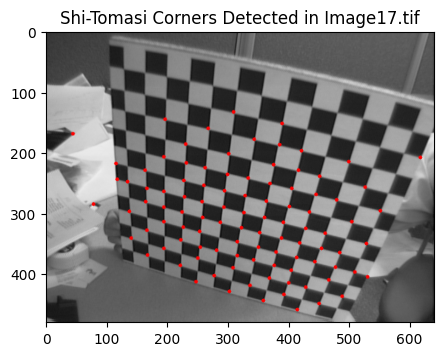

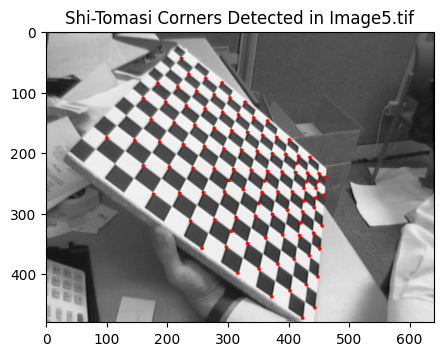

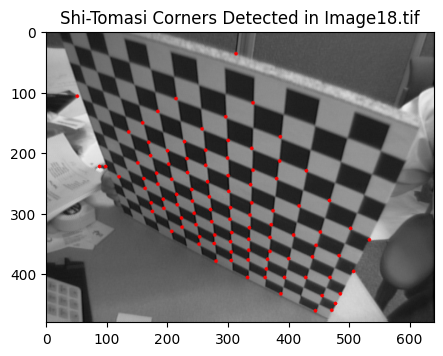

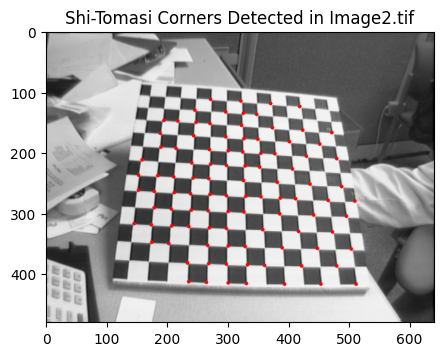

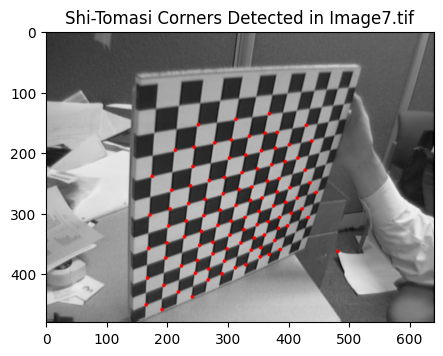

In [ ]:
#Shi-Tomasi
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# Get a list of all .tif images in the specified directory
images = glob.glob('*.tif')  # Update with the correct path

for fname in images:
    # Read each image
    image = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Shi-Tomasi corner detector
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.int0(corners)

    # Draw circles on the original image at the corner points
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Visualize the image with matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(image_rgb)
    plt.title(f'Shi-Tomasi Corners Detected in {fname}')
    plt.show()


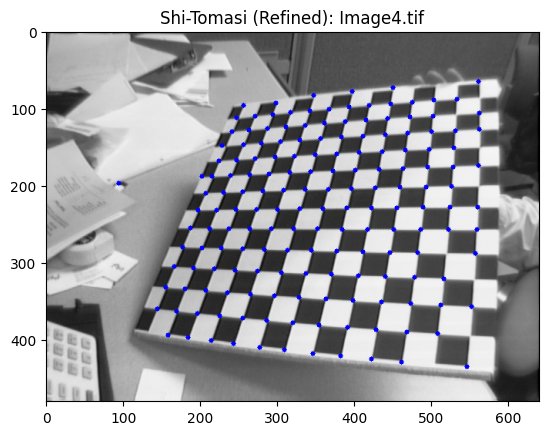

image points
[array([[[255.71458 , 208.58073 ]],

       [[343.88034 , 182.65056 ]],

       [[377.6912  , 285.67328 ]],

       [[292.655   , 256.5954  ]],

       [[274.96457 , 311.68652 ]],

       [[440.97366 , 318.52747 ]],

       [[308.78214 , 206.94221 ]],

       [[352.57605 , 256.9822  ]],

       [[322.99622 , 162.22243 ]],

       [[328.8346  , 345.57376 ]],

       [[384.22693 , 257.07175 ]],

       [[482.46567 , 287.72156 ]],

       [[329.5596  , 230.58698 ]],

       [[366.2164  , 205.30223 ]],

       [[337.4459  , 314.45886 ]],

       [[246.75452 , 231.68411 ]],

       [[344.9879  , 284.89526 ]],

       [[281.77386 , 207.72823 ]],

       [[239.86055 , 187.73637 ]],

       [[273.25323 , 231.42938 ]],

       [[508.38467 , 392.6039  ]],

       [[289.84537 , 185.26996 ]],

       [[398.39795 , 349.91165 ]],

       [[313.9326  , 284.15433 ]],

       [[316.28    , 183.86151 ]],

       [[411.3673  , 286.31345 ]],

       [[370.52606 , 315.8538  ]],

       [[207.1

In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# Define the dimensions of the checkerboard
checkerboard_size = (13, 13)

# Define the square size (assuming equal length and width)
square_size = 1.0  # Replace with your actual square size

# Prepare object points (0,0,0), (1,0,0), (2,0,0) ....,(12,12,0)
objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)
objp *= square_size  # Multiply by the square size

# Arrays to store object points and image points for all images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

# List of images
images = glob.glob('Image4.tif')  # Modify this if your images are located in a different directory

# Loop over images to find the chessboard corners using Shi-Tomasi method
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Use Shi-Tomasi method to find corners
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=checkerboard_size[0] * checkerboard_size[1], qualityLevel=0.01, minDistance=10)

    # If corners are found, refine them and add to the points lists
    if corners is not None:
        # Refining pixel coordinates for given 2d points.
        corners = cv2.cornerSubPix(gray, corners, winSize=(11, 11), zeroZone=(-1, -1), criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))

        # If the number of corners found is as expected, save them
        if corners.shape[0] == checkerboard_size[0] * checkerboard_size[1]:
            objpoints.append(objp)  # Append the 3D points
            imgpoints.append(corners)  # Append the 2D points

            # Draw the corners on the image
            for corner in corners:
                cv2.circle(img, tuple(corner.ravel().astype(int)), 3, (255, 0, 0), -1)

            # Display the image with matplotlib
            plt.figure()
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"Shi-Tomasi (Refined): {fname}")
            plt.show()



print('image points')
print(imgpoints)


In [ ]:

# Assuming objpoints and imgpoints are already filled from previous steps
# We will take the points from the first image as an example
object_points = objpoints[0]  # 3D points in real-world space
image_points = imgpoints[0]   # Corresponding 2D points in the image

# Convert points to the correct shape
object_points = object_points[:, :2]  # We only need X and Y for homography (assuming Z=0 for the chessboard plane)
image_points = np.squeeze(image_points)  # Remove redundant dimensions

# Find homography matrix using Direct Linear Transform
# The function cv2.findHomography returns the homography matrix and a mask of inliers
H, mask = cv2.findHomography(object_points, image_points, method=cv2.RANSAC)

# Print out the homography matrix
print("Homography Matrix:")
print(H)


Homography Matrix:
[[-1.55767230e+01  4.56539590e+00  2.56024687e+02]
 [-1.90308426e+01  5.33087295e+00  2.09201647e+02]
 [-9.93757615e-03 -5.68260326e-02  1.00000000e+00]]


In [ ]:
import numpy as np
import cv2

# Let's assume some standard intrinsic parameters
fx = fy = 800  # focal length in pixels
cx, cy = (640 / 2, 480 / 2)  # Assuming a 640x480 image, replace with your actual image size

# Construct the intrinsic parameter matrix K
K = np.array([[fx,  0, cx],
              [ 0, fy, cy],
              [ 0,  0,  1]])

# Invert the K matrix
K_inv = np.linalg.inv(K)

# Placeholder for your homography matrix
# H = ...

# Normalize with the scale factor lambda
lambda_scale = 1 / np.linalg.norm(np.dot(K_inv, H[:, 0]))
B = lambda_scale * np.dot(K_inv, H)

# Ensure B is a valid rotation-translation matrix
r1 = B[:, 0]
r2 = B[:, 1]
r3 = np.cross(r1, r2)
t = B[:, 2]

# Make sure the rotation matrix is orthogonal
R = np.vstack((r1, r2, r3)).T
U, S, Vt = np.linalg.svd(R)
R = U @ Vt

# Make sure we have a right-handed coordinate system
if np.linalg.det(R) < 0:
    R[:, -1] *= -1

print("Rotation Matrix R:")
print(R)
print("\nTranslation Vector t:")
print(t)


Rotation Matrix R:
[[-0.50818454  0.39085807  0.76744931]
 [-0.71275061  0.30935009 -0.62951496]
 [-0.48346152 -0.86690974  0.12137739]]

Translation Vector t:
[-2.87848717 -1.38573242 35.99497416]


In [ ]:
import numpy as np
import cv2

# Assumed standard intrinsic parameters
fx = fy = 800  # focal length in pixels
cx, cy = (640 / 2, 480 / 2)  # Assuming a 640x480 image

# Intrinsic parameter matrix K
K = np.array([[fx,  0, cx],
              [ 0, fy, cy],
              [ 0,  0,  1]])

# Placeholder for your computed homography matrix
# H = ...

# Normalization to ensure the scale of H is correct
H_normalized = np.dot(np.linalg.inv(K), H)
H_normalized = H_normalized / np.linalg.norm(H_normalized[:, 0])

# Extracting rotation and translation from the normalized homography matrix
r1 = H_normalized[:, 0]
r2 = H_normalized[:, 1]
r3 = np.cross(r1, r2)

t = H_normalized[:, 2]

# Ensuring the rotation matrix is orthonormal
R = np.column_stack((r1, r2, r3))
U, _, Vt = np.linalg.svd(R)
R = np.dot(U, Vt)

# If necessary, convert the rotation matrix to a rotation vector
rotation_vector, _ = cv2.Rodrigues(R)

print("Rotation Vector:")
print(rotation_vector)
print("\nTranslation Vector:")
print(t)


Rotation Vector:
[[-0.30146682]
 [ 1.58852741]
 [-1.40146891]]

Translation Vector:
[-2.87848717 -1.38573242 35.99497416]


In [ ]:
input_string = '''[array([[[255.71458 , 208.58073 ]],

       [[343.88034 , 182.65056 ]],

       [[377.6912  , 285.67328 ]],

       [[292.655   , 256.5954  ]],

       [[274.96457 , 311.68652 ]],

       [[440.97366 , 318.52747 ]],

       [[308.78214 , 206.94221 ]],

       [[352.57605 , 256.9822  ]],

       [[322.99622 , 162.22243 ]],

       [[328.8346  , 345.57376 ]],

       [[384.22693 , 257.07175 ]],

       [[482.46567 , 287.72156 ]],

       [[329.5596  , 230.58698 ]],

       [[366.2164  , 205.30223 ]],

       [[337.4459  , 314.45886 ]],

       [[246.75452 , 231.68411 ]],

       [[344.9879  , 284.89526 ]],

       [[281.77386 , 207.72823 ]],

       [[239.86055 , 187.73637 ]],

       [[273.25323 , 231.42938 ]],

       [[508.38467 , 392.6039  ]],

       [[289.84537 , 185.26996 ]],

       [[398.39795 , 349.91165 ]],

       [[313.9326  , 284.15433 ]],

       [[316.28    , 183.86151 ]],

       [[411.3673  , 286.31345 ]],

       [[370.52606 , 315.8538  ]],

       [[207.18    , 210.30879 ]],

       [[271.95547 , 165.51741 ]],

       [[320.15143 , 378.47955 ]],

       [[382.49777 , 421.71915 ]],

       [[196.87045 , 366.35806 ]],

       [[354.66602 , 381.53555 ]],

       [[390.47574 , 229.89983 ]],

       [[286.73355 , 375.42352 ]],

       [[473.4046  , 353.95465 ]],

       [[363.11423 , 347.8516  ]],

       [[235.77583 , 339.22696 ]],

       [[237.66995 , 256.21893 ]],

       [[516.1023  , 321.031   ]],

       [[212.1246  , 256.02322 ]],

       [[336.8915  , 205.9948  ]],

       [[202.14728 , 281.28693 ]],

       [[255.43825 , 282.69922 ]],

       [[247.94896 , 167.11902 ]],

       [[451.22086 , 257.4057  ]],

       [[305.29724 , 313.0664  ]],

       [[461.5741  , 429.2402  ]],

       [[309.8824  , 413.65274 ]],

       [[417.33038 , 257.3375  ]],

       [[329.78156 , 141.64218 ]],

       [[265.3313  , 341.33786 ]],

       [[428.79187 , 387.32693 ]],

       [[296.47827 , 343.55533 ]],

       [[321.8604  , 256.71677 ]],

       [[283.81973 , 283.51276 ]],

       [[187.39873 , 255.81348 ]],

       [[279.78397 , 145.5464  ]],

       [[255.40663 , 372.35095 ]],

       [[377.78906 , 159.08676 ]],

       [[359.4038  , 230.16426 ]],

       [[224.86717 , 168.67467 ]],

       [[405.34854 , 317.38162 ]],

       [[221.67145 , 232.00865 ]],

       [[230.91519 , 209.52577 ]],

       [[287.1124  , 126.485535]],

       [[422.48663 , 229.47096 ]],

       [[215.61537 , 188.89224 ]],

       [[427.71933 , 203.64424 ]],

       [[349.83136 , 160.58258 ]],

       [[356.27893 , 139.69815 ]],

       [[297.0311  , 163.78853 ]],

       [[317.74603 , 105.85028 ]],

       [[241.55643 , 130.81512 ]],

       [[227.96695 , 281.87357 ]],

       [[401.8944  , 180.27296 ]],

       [[391.33643 , 384.46204 ]],

       [[225.22261 , 369.37973 ]],

       [[300.70306 , 231.03235 ]],

       [[435.3748  , 351.9804  ]],

       [[214.47319 , 401.94232 ]],

       [[372.35358 , 181.48372 ]],

       [[245.77374 , 310.09988 ]],

       [[443.8034  , 113.74319 ]],

       [[455.73898 , 229.2636  ]],

       [[243.87436 , 405.74237 ]],

       [[436.29465 , 156.11586 ]],

       [[411.50494 , 136.12776 ]],

       [[367.27698 , 101.06428 ]],

       [[446.41327 , 287.17612 ]],

       [[522.1627  , 257.55258 ]],

       [[361.7825  , 119.79922 ]],

       [[463.59366 , 178.04678 ]],

       [[396.4709  , 204.36363 ]],

       [[336.0791  , 122.08457 ]],

       [[191.70561 , 307.4173  ]],

       [[294.05502 , 108.27449 ]],

       [[557.3721  , 288.85693 ]],

       [[256.3652  , 147.41673 ]],

       [[383.40393 , 137.75429 ]],

       [[277.31125 , 410.0255  ]],

       [[347.43588 ,  83.84615 ]],

       [[304.50882 , 143.58809 ]],

       [[271.3957  , 110.70811 ]],

       [[311.2365  , 124.22852 ]],

       [[432.25925 , 179.146   ]],

       [[342.03143 , 103.43768 ]],

       [[552.83813 , 357.58307 ]],

       [[264.5038  , 256.36435 ]],

       [[298.      ,  93.      ]],

       [[489.81787 , 228.6857  ]],

       [[264.19913 , 186.46399 ]],

       [[419.84055 ,  96.53398 ]],

       [[397.6192  ,  78.638565]],

       [[202.      , 188.      ]],

       [[218.14314 , 308.74106 ]],

       [[406.61545 , 157.4699  ]],

       [[346.6528  , 418.0893  ]],

       [[169.73418 , 363.4136  ]],

       [[197.38902 , 232.46193 ]],

       [[546.09485 , 435.8312  ]],

       [[478.42032 , 319.8401  ]],

       [[469.8699  , 132.62746 ]],

       [[166.7527  , 305.84537 ]],

       [[440.37    , 134.2242  ]],

       [[495.6914  , 176.82617 ]],

       [[526.6618  , 201.37572 ]],

       [[493.01248 , 202.24715 ]],

       [[388.4012  , 117.776474]],

       [[158.52934 , 394.12192 ]],

       [[486.4711  , 257.60074 ]],

       [[415.74417 , 115.62258 ]],

       [[459.7408  , 202.72186 ]],

       [[475.3141  ,  92.223404]],

       [[144.37018 , 360.47952 ]],

       [[450.2179  ,  73.79747 ]],

       [[561.95386 , 174.81577 ]],

       [[207.52301 , 336.84985 ]],

       [[529.8005  , 151.83467 ]],

       [[560.30255 , 228.04788 ]],

       [[155.46869 , 332.58688 ]],

       [[263.94904 , 128.60323 ]],

       [[472.62833 , 111.66961 ]],

       [[497.9229  , 153.35753 ]],

       [[528.46893 , 176.0255  ]],

       [[247.3596  , 112.902084]],

       [[228.81192 , 148.58737 ]],

       [[447.28098 ,  94.11529 ]],

       [[180.9456  , 334.70886 ]],

       [[524.598   , 228.60141 ]],

       [[177.32745 , 280.38818 ]],

       [[228.81456 , 148.58649 ]],

       [[502.2153  , 110.10795 ]],

       [[256.2198  ,  96.98827 ]],

       [[468.43414 , 390.05948 ]],

       [[466.69357 , 154.47516 ]],

       [[422.7299  , 425.78458 ]],

       [[533.13654 ,  88.37429 ]],

       [[393.17902 ,  98.61624 ]],

       [[531.0979  , 129.55843 ]],

       [[562.80817 , 106.68857 ]],500.27542 , 130.86852 ]],[[562.6926  , 127.8827  ]],[[503.89572 ,  89.99262 ]],[[ 94.621475, 197.1133  ]],[[184.66623 , 397.80048 ]],[[561.7357  ,  65.30045 ]],[[512.66486 , 355.873   ]],[[559.1319  , 257.78503 ]]], dtype=float32)]'''

# Remove spaces after commas
output_string = input_string.replace(", ", ",")

print(output_string)


[array([[[255.71458 ,208.58073 ]],

       [[343.88034 ,182.65056 ]],

       [[377.6912  ,285.67328 ]],

       [[292.655   ,256.5954  ]],

       [[274.96457 ,311.68652 ]],

       [[440.97366 ,318.52747 ]],

       [[308.78214 ,206.94221 ]],

       [[352.57605 ,256.9822  ]],

       [[322.99622 ,162.22243 ]],

       [[328.8346  ,345.57376 ]],

       [[384.22693 ,257.07175 ]],

       [[482.46567 ,287.72156 ]],

       [[329.5596  ,230.58698 ]],

       [[366.2164  ,205.30223 ]],

       [[337.4459  ,314.45886 ]],

       [[246.75452 ,231.68411 ]],

       [[344.9879  ,284.89526 ]],

       [[281.77386 ,207.72823 ]],

       [[239.86055 ,187.73637 ]],

       [[273.25323 ,231.42938 ]],

       [[508.38467 ,392.6039  ]],

       [[289.84537 ,185.26996 ]],

       [[398.39795 ,349.91165 ]],

       [[313.9326  ,284.15433 ]],

       [[316.28    ,183.86151 ]],

       [[411.3673  ,286.31345 ]],

       [[370.52606 ,315.8538  ]],

       [[207.18    ,210.30879 ]],

       [[271.95547 